### Red Wine Quality Prediction 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. This dataset conatins the data like 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates' and 'alcohol' as <b>input variables</b> and 'quality' as <b>output variable</b>.


In [4]:
#import the dataset
df = pd.read_csv('https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv')
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 33, saw 8


In [60]:
### i got an error so i took raw data from the given link 
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


This dataset contains the details of quality of wine in  which both continous and discrete data are present. Here 'quality' is the target variable which contains 3 to 8 categories so it will be termed as 'classififcation problem'. 

In [61]:
#first five data
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
#last five data
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### <b>Exploratory data Analysis</b>

In [63]:
df.shape

(1599, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This datatset contains 1599 rows and 12 columns in which 11 are independent variable and 1 is a target variable. The datatype of the dataset is 11 columns are float type and target variable is int datatype and we also get index values, shape of dataset and we also observe that there are no null values. 

In [65]:
#check for null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Again we confirmed there are no null values so no need to treat nan or null values which means our dataset is partially clean. next we need to check the unique values of our dataset .

In [66]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

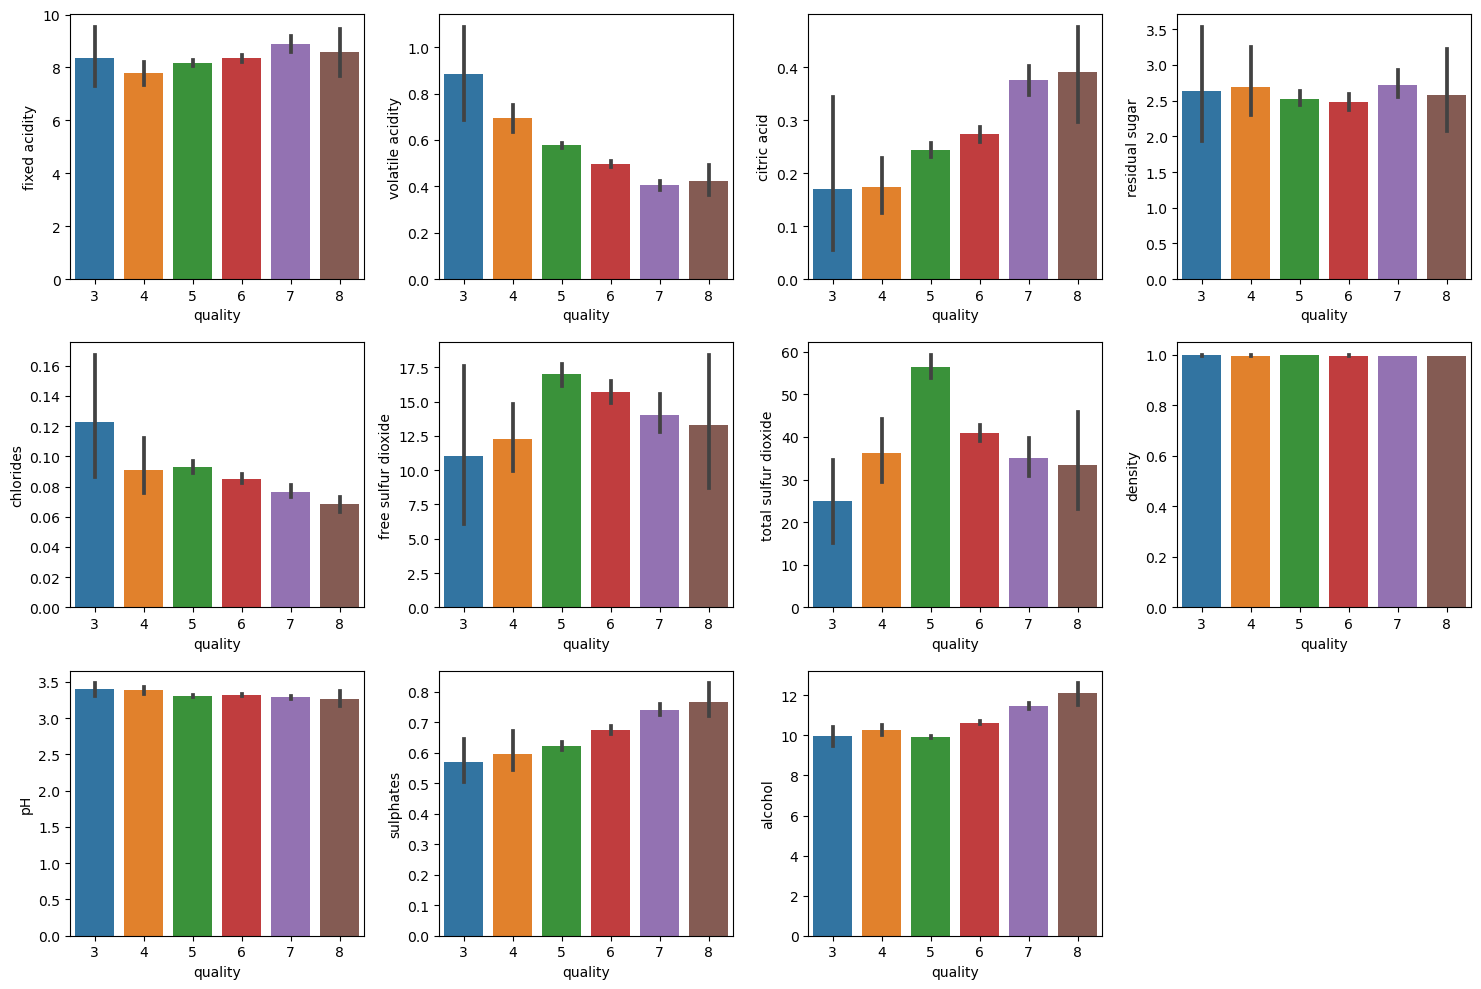

In [67]:
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=df)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=df)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=df)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=df)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=df)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=df)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=df)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=df)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=df)

plt.tight_layout()

from the above plot we observe that 

1. quality increses with citric acid, sulphates and alcohol.
2. we have high quality when volatile acidity and chlorides contents are less
3. quality is equal with increase in pH and density values.

In [68]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Since we are building classification model we see that there is multiclass classification in target variable so according to the problem statement we set an arbitrary cuttoff to 7 and above as good wine(1) and the values below 7 as bad wine(0). so we convert multiclass variable to binary class variable.  

In [69]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [70]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [71]:
#now again check for unique values
df['quality'].unique()

array([0, 1], dtype=int64)

So, now we have converted to binary classification varaible. now we check for null values and other details 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We see our dataset remains same, there are no null values and also shape remains same.

In [73]:
#now we will check for the value counts in target variable

df['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

0    1382
1     217
Name: quality, dtype: int64


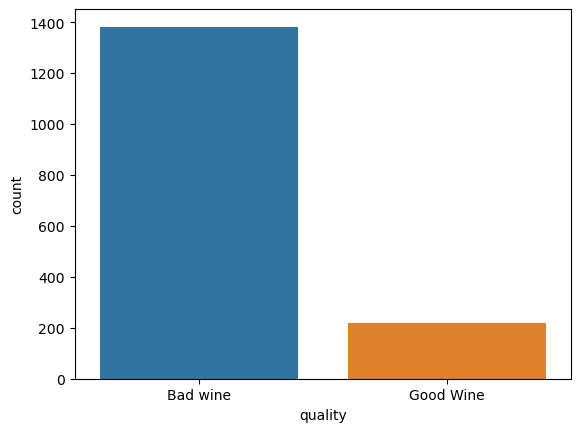

In [74]:
#visualize the value counts of target variable
sns.countplot(x = 'quality', data = df)
plt.xticks([0,1],['Bad wine','Good Wine'])
print(df['quality'].value_counts())

from the visualization of datset we observe that the data is imbalanced. so we use resampling techniques to balance the dataset in later part. Next we check with the satatistics of data.

In [75]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


### <b>Observations:</b>
1. All the counts are same which means no null values.
2. Std deviation is less compared to mean i.e., less the std deviation, the better the data.
3. Mean values are slightly higher than the median value in almost all columns except density which means there is right skewness in all columns.
4. Max values of fixed acidity, residual sugar, sulfur dioxides, density, sulphates, alcohol are high which means there are some    outliers.

### Data Visualization

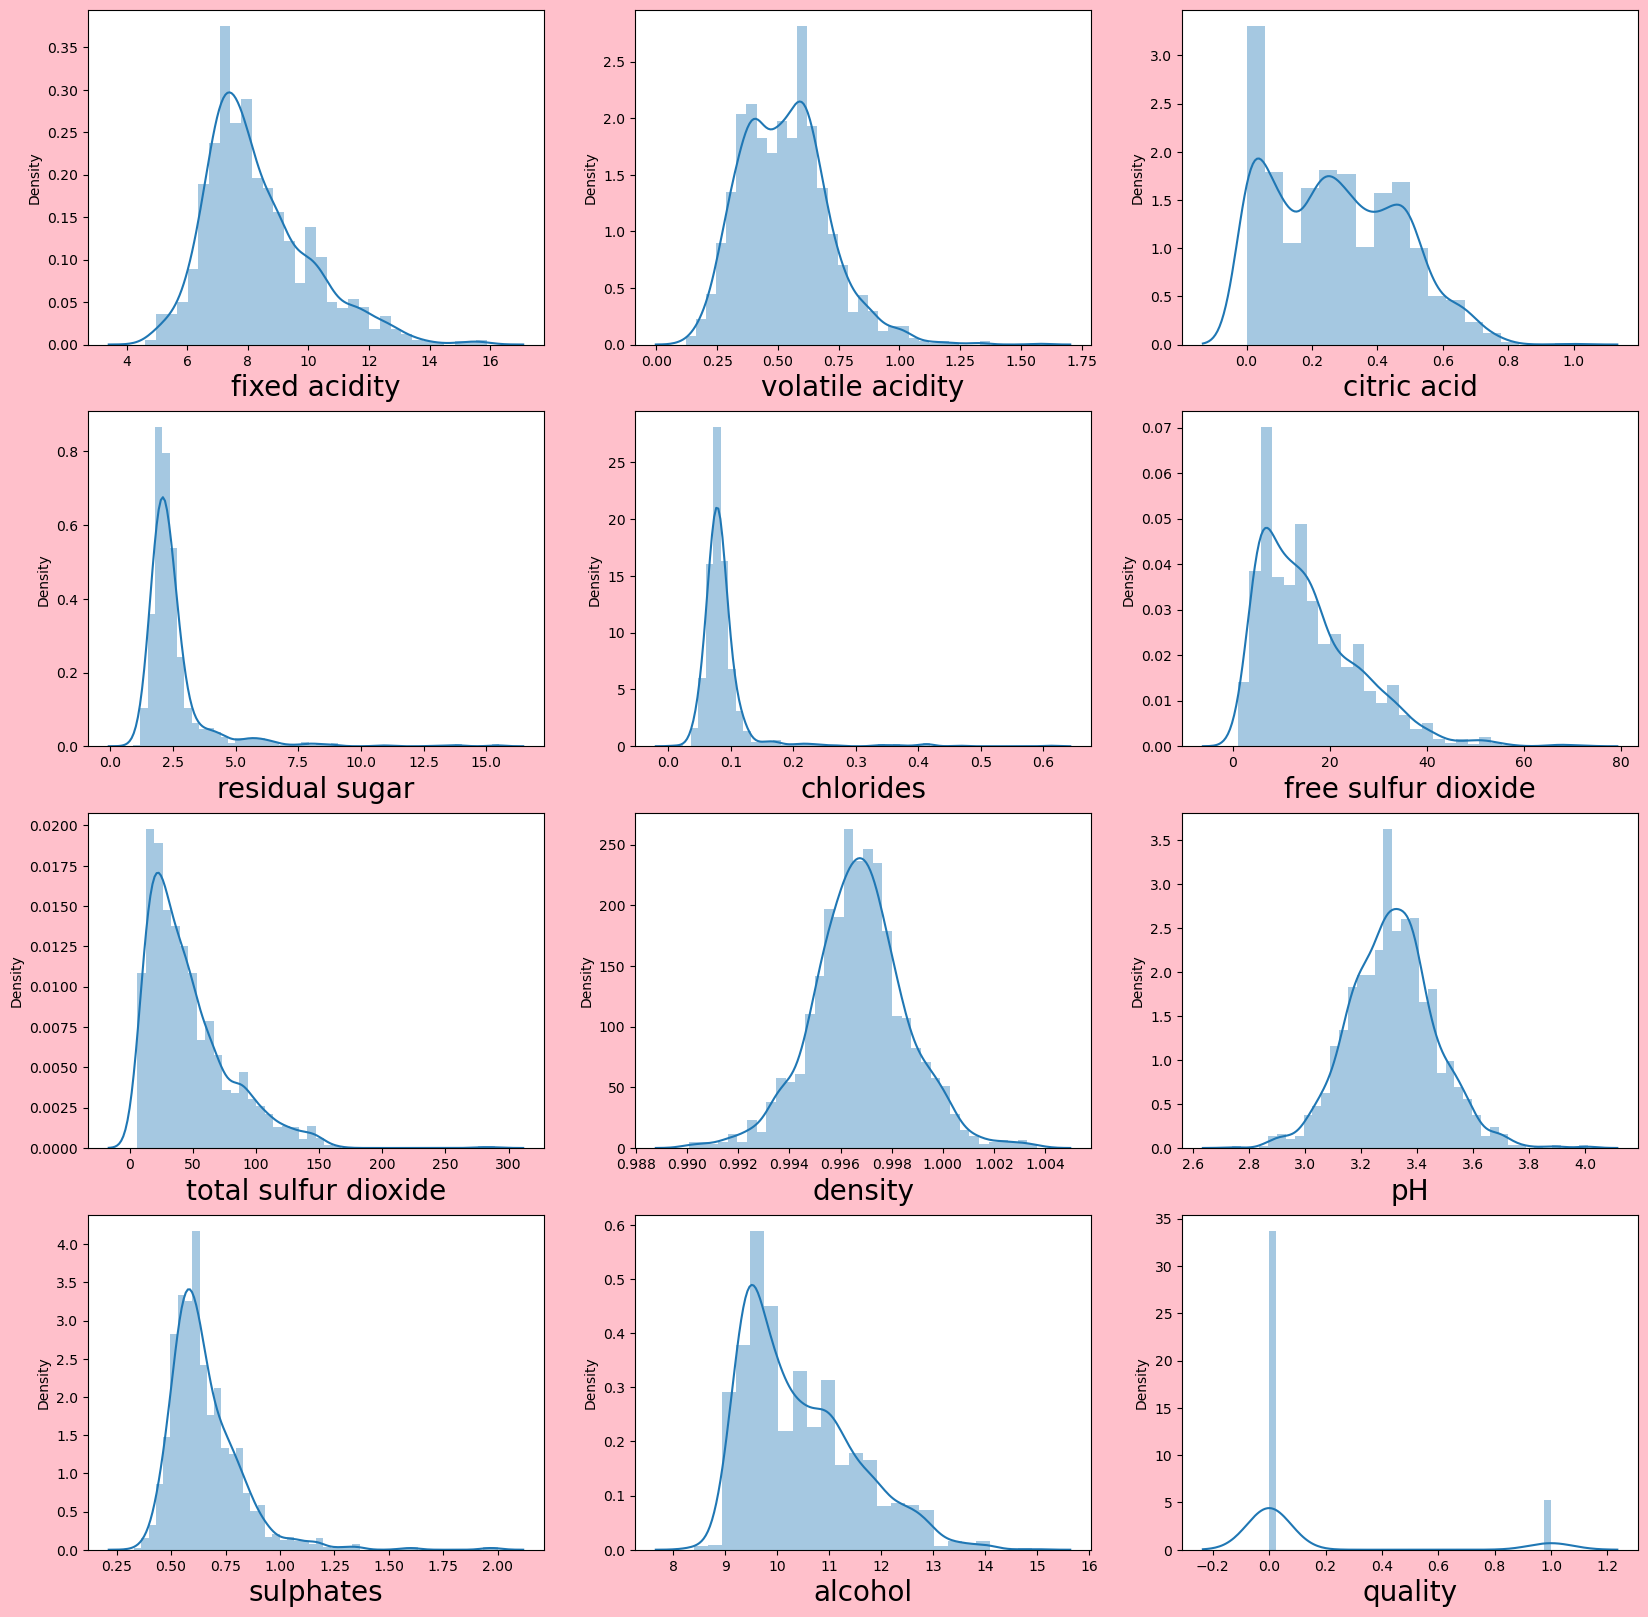

In [76]:
plt.figure(figsize =(20,20), facecolor = 'pink')
num = 1
for column in df:
    if num <=12:
        ax = plt.subplot(4,3,num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    num +=1
plt.show()

from the above distribution plots we can notice that the data almost looks normal in all the columns and also there is a right skewness in all columns, ph value has both right and left skewness.

In [77]:
x=df.drop(columns = ['quality'])
y=df['quality']

In [78]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


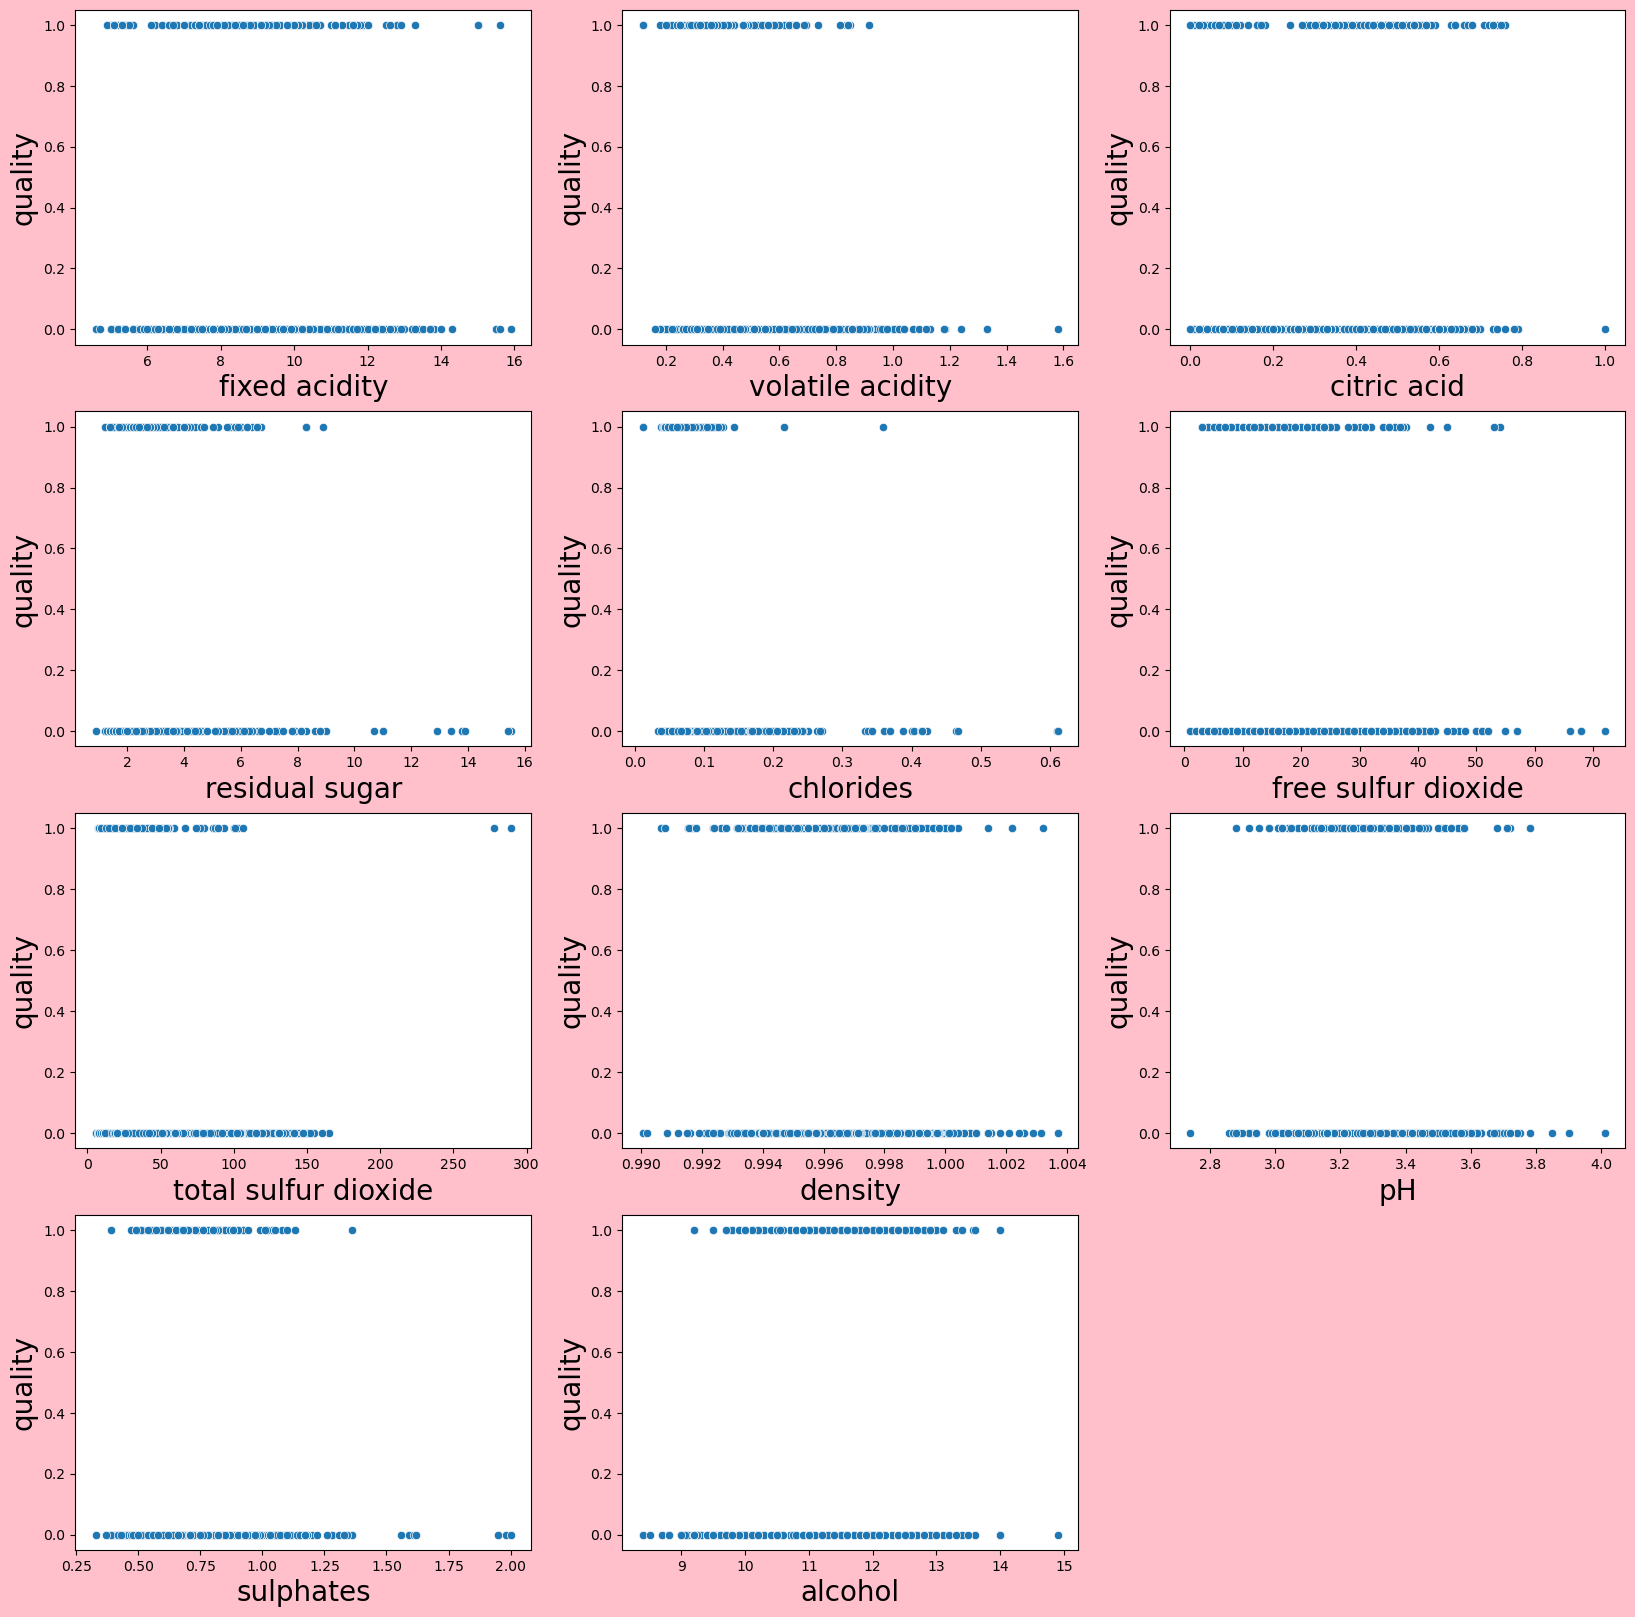

In [79]:
plt.figure(figsize =(20,20), facecolor = 'pink')
num = 1
for column in x:
    if num <=12:
        ax = plt.subplot(4,3,num)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('quality', fontsize=20)
    num +=1
plt.show()

from the above plot we see that as the features value increases the quality of wine is also increasing, so there is relation with features and target variables. so next we will check the correlation of the datset

In [80]:
df.corr()['quality']

fixed acidity           0.120061
volatile acidity       -0.270712
citric acid             0.214716
residual sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

In [81]:
df.corr()['quality'].sort_values()

volatile acidity       -0.270712
density                -0.150460
total sulfur dioxide   -0.139517
chlorides              -0.097308
free sulfur dioxide    -0.071747
pH                     -0.057283
residual sugar          0.047779
fixed acidity           0.120061
sulphates               0.199485
citric acid             0.214716
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

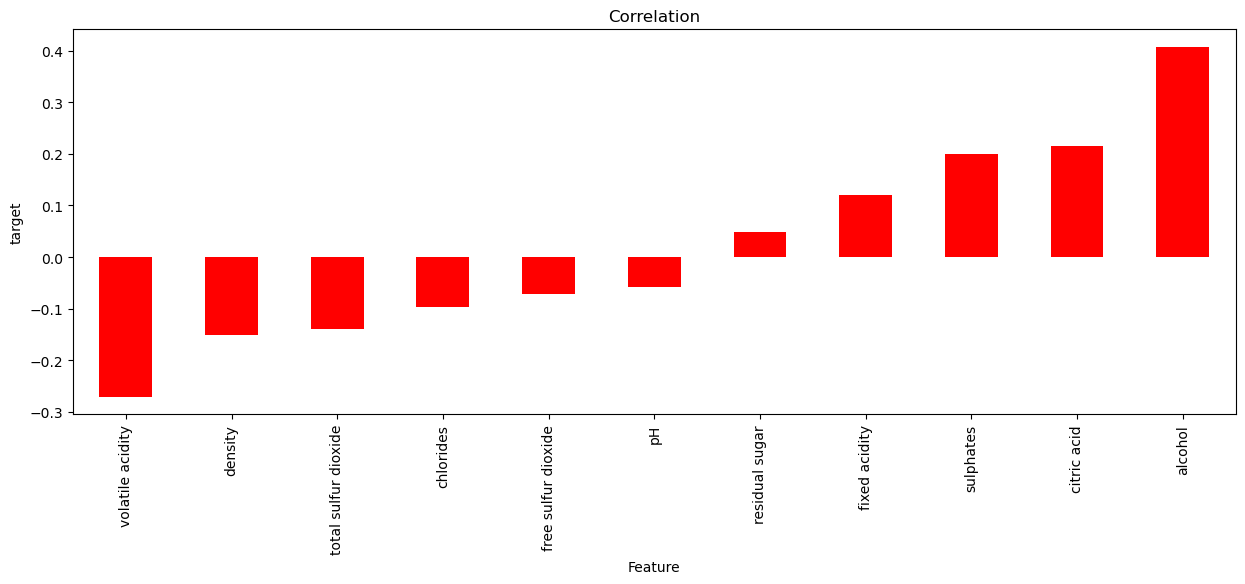

In [82]:
plt.figure(figsize=(15,5))
df.corr()['quality'].sort_values(ascending=True).drop(['quality']).plot(kind='bar',color='red')
plt.title('Correlation')
plt.xlabel('Feature')
plt.ylabel('target')
plt.show()

we observe that some features are negatively  corelated and some are positively corelated but we also see that 'alcohol' is highly corelated with the target variable and 'pH','residual Sugar' are having less relation with target variable. 

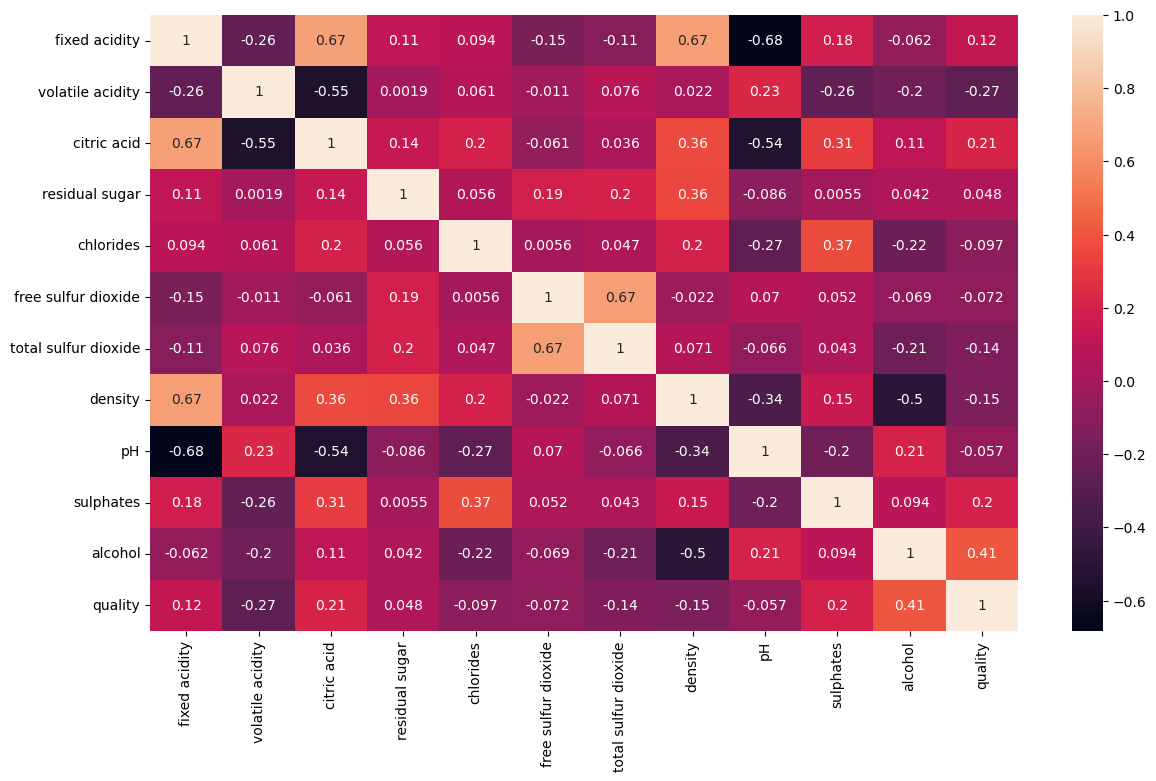

In [83]:
df_corr = df.corr()

plt.figure(figsize = (14,8))
sns.heatmap(df_corr,annot=True,annot_kws ={'size':10})
plt.show()

from the above plot we see that features 'density' and 'fixed acidity' are corelated and 'free sulfur dioxide' and 'total sulfur dioxide' are corelated and also we see that our target variable 'quality' is slightly corelated witn feature variable 'alcohol' since we have less data we cannot remove any data.

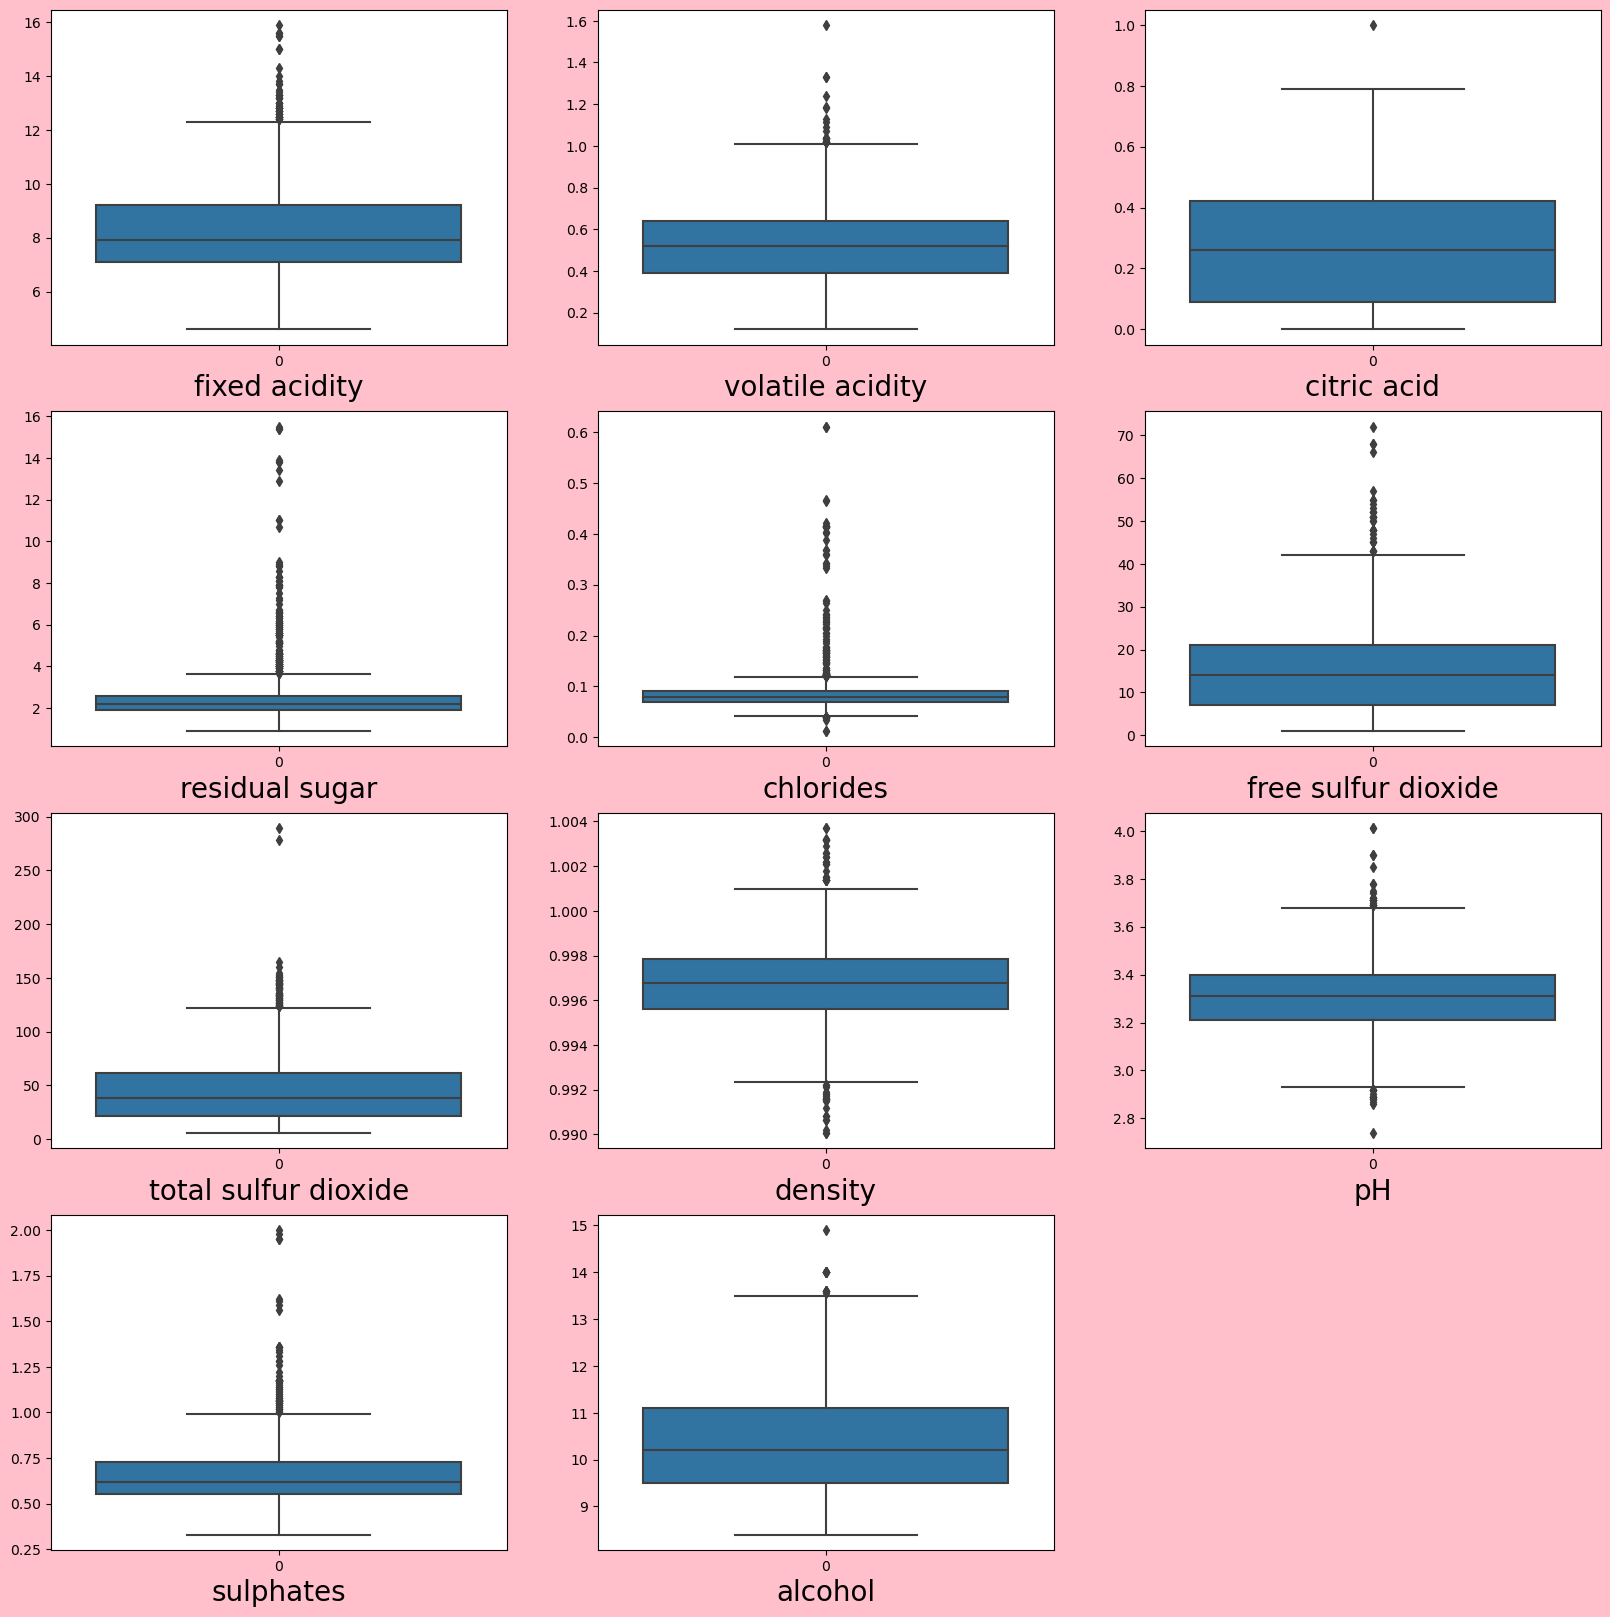

In [84]:
#outliers detection

plt.figure(figsize =(20,20), facecolor = 'pink')
num = 1

for column in x:
    if num <=12:
        plt.subplot(4,3,num)
        sns.boxplot(data = x[column])
        plt.xlabel(column,fontsize = 20)
    num +=1
plt.show()

We observe there are outliers in upperside of all the features and 'chlorides', 'density' and 'pH' has outliers in both upper and lower side, so we check for removing the outliers using different techniques 

In [85]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [86]:
#Lets remove the outliers if present using z scores  and threshold = 3
from scipy.stats import zscore
z_score = zscore(df)
z_score

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.396256
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.396256
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.396256
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,-0.396256
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.396256
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,-0.396256
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,-0.396256
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.396256


In [87]:
z=np.abs(z_score)
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.396256
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.396256
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.396256
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.396256
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.396256
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.396256
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.396256


In [88]:
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [89]:
new_df=df[(z<3).all(axis=1)]
new_df.shape

(1458, 12)

In [90]:
print("data_loss =   ", ((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

data_loss =    8.818011257035648


#### IQR Method

In [91]:
#using IQR method
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)

iqr = q3-q1

iqr_df = df[~((df <(q1 - 1.5*iqr))| (df>(q3+1.5*iqr))).any(axis=1)]

In [92]:
iqr_df.shape

(1194, 12)

In [93]:
print("data_loss =   ", ((df.shape[0]-iqr_df.shape[0])/df.shape[0])*100)

data_loss =    25.328330206378986


we check dataloss using zscore and also iqr method where values are 8.81% and 25.38% respectively so we consider new dataframe obtained after removing the outliers using z score method.

In [94]:
#reset the index values.
new_df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1454,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1455,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1456,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


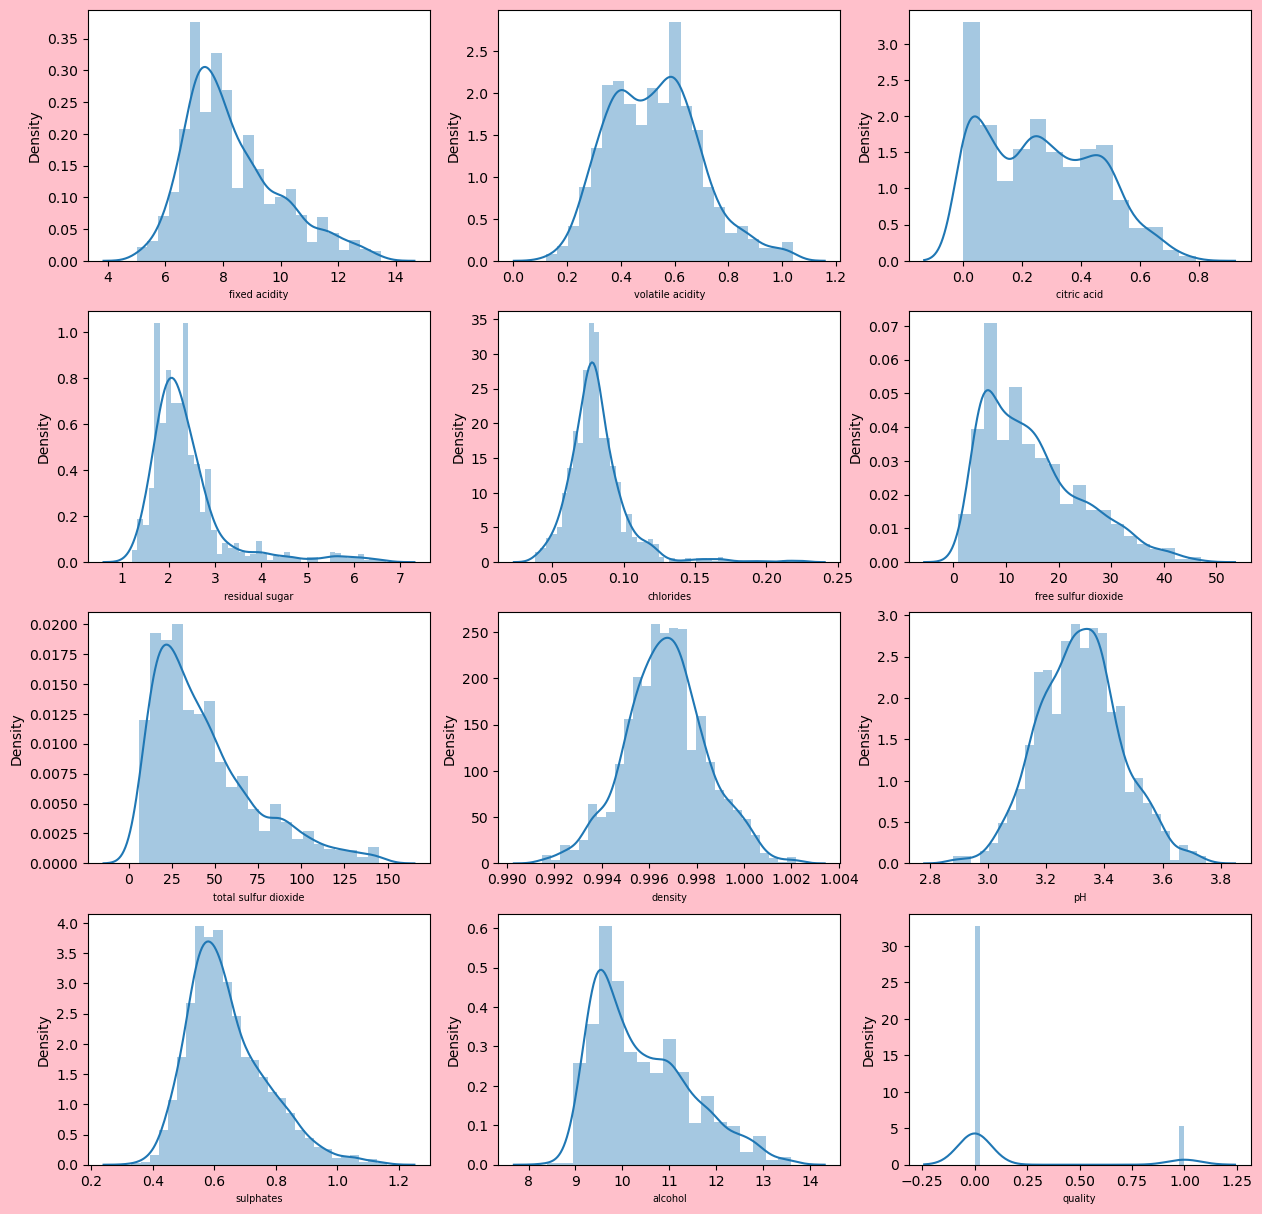

In [95]:
#considering the new
_df and checking for the distribution

plt.figure(figsize =(15,15), facecolor = 'pink')
num = 1
for column in new_df:
    if num <=12:
        ax = plt.subplot(4,3,num)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize = 7)
        
    num +=1
plt.show()

In [96]:
#check for the skewness
new_df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

we see higher skewness in residual sugar, chlorides and total sulfur dioxide, we also see that there are almost 7 features having high skewness

In [97]:
new_df.skew().index

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [98]:
X = new_df.drop(columns = ['quality'])
y = new_df['quality']

In [99]:
#removing skewness 
for index in X.skew().index:
    if X.skew().loc[index] >0.55:
        X[index] = np.cbrt(X[index])

In [100]:
X.skew()

fixed acidity           0.527560
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.526494
alcohol                 0.643830
dtype: float64

We observe that we have reduced the skewness of 4 features, i.e., fixed acidity, free sulfur dioxide, total sulfur dioxide and sulphates. but still we have skewness in residual sugar, chlorides, and alcohol. 

In [101]:
for index in X.skew().index:
    if X.skew().loc[index] >0.55:
        X[index] = np.sqrt(X[index])

In [102]:
X.skew()

fixed acidity           0.527560
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.427811
chlorides               0.785445
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.526494
alcohol                 0.616189
dtype: float64

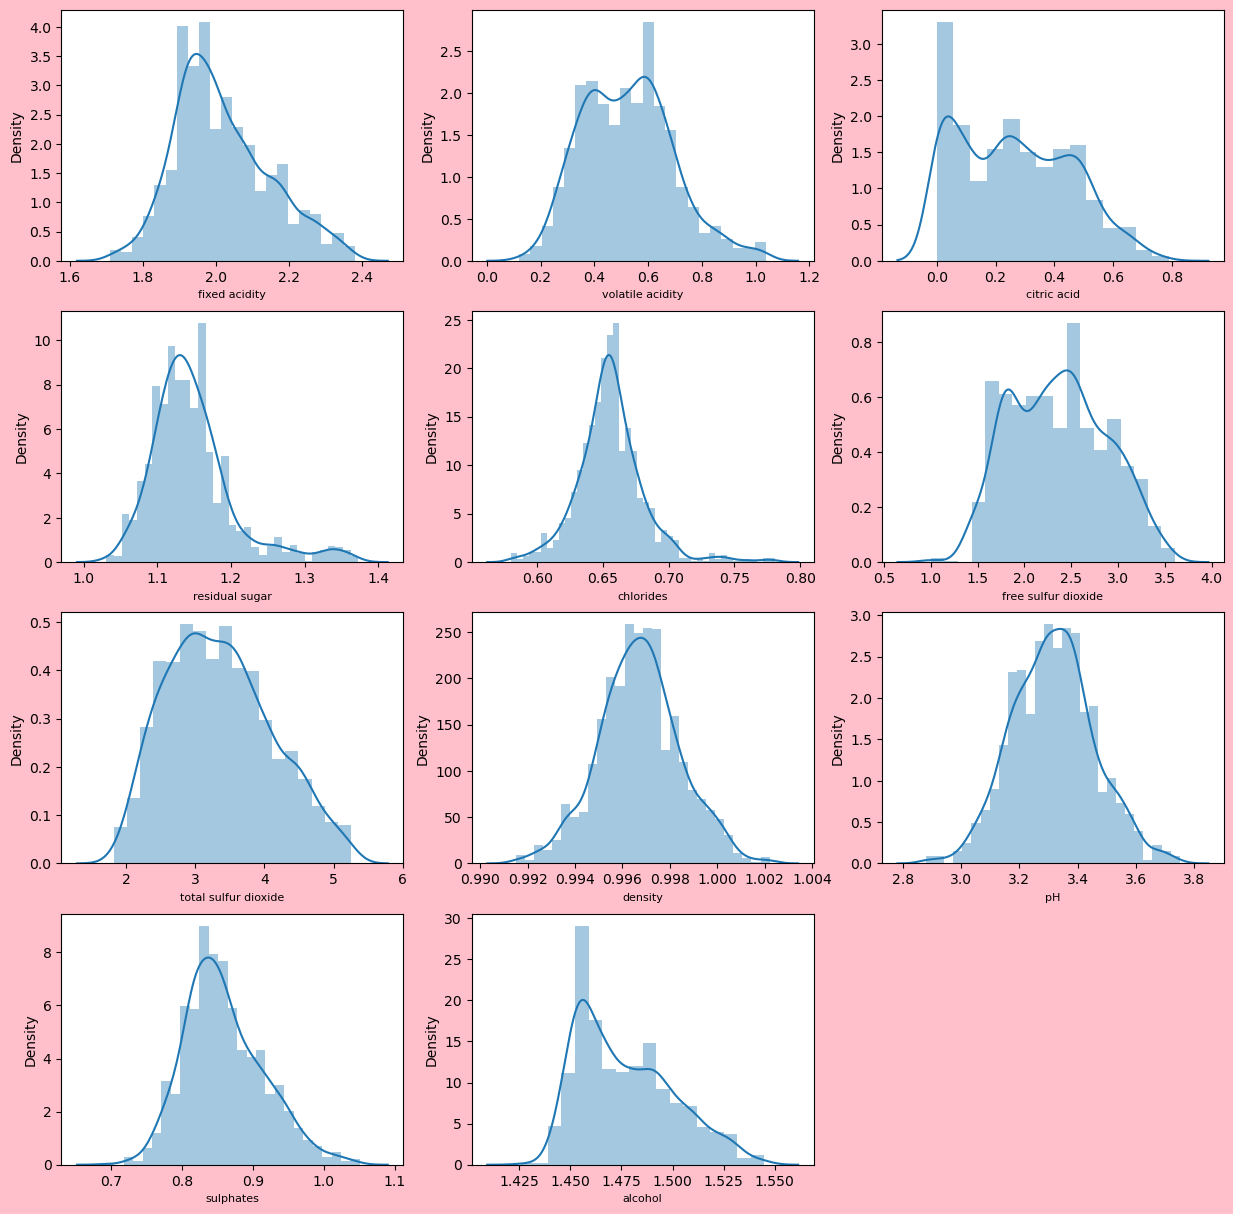

In [103]:
plt.figure(figsize =(15,15), facecolor = 'pink')
num = 1
for column in X:
    if num <=11:
        ax = plt.subplot(4,3,num)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize = 8)
        
    num +=1
plt.show()

We still have skewness in data but we will move forward 

In [104]:
#now we check for the correlation 
new_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296566,0.699747,0.175809,0.187853,-0.146702,-0.098843,0.660497,-0.704507,0.200796,-0.018384,0.124746
volatile acidity,-0.296566,1.000000,-0.589286,0.032331,0.070307,0.008824,0.104585,-0.000446,0.252900,-0.350547,-0.212767,-0.268236
citric acid,0.699747,-0.589286,1.000000,0.178784,0.104950,-0.072097,0.007320,0.372338,-0.521270,0.303401,0.164420,0.226809
residual sugar,0.175809,0.032331,0.178784,1.000000,0.121287,-0.005795,0.091381,0.343236,-0.072787,0.071218,0.162423,0.115612
chlorides,0.187853,0.070307,0.104950,0.121287,1.000000,-0.057342,0.040874,0.330104,-0.183105,0.025329,-0.209711,-0.112431
free sulfur dioxide,-0.146702,0.008824,-0.072097,-0.005795,-0.057342,1.000000,0.660348,-0.039334,0.107444,0.059713,-0.076400,-0.085448
total sulfur dioxide,-0.098843,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,-0.007726,-0.037164,-0.257834,-0.171294
density,0.660497,-0.000446,0.372338,0.343236,0.330104,-0.039334,0.116386,1.000000,-0.311217,0.127562,-0.469611,-0.154221
pH,-0.704507,0.252900,-0.521270,-0.072787,-0.183105,0.107444,-0.007726,-0.311217,1.000000,-0.039558,0.136659,-0.079528
sulphates,0.200796,-0.350547,0.303401,0.071218,0.025329,0.059713,-0.037164,0.127562,-0.039558,1.000000,0.240684,0.310206


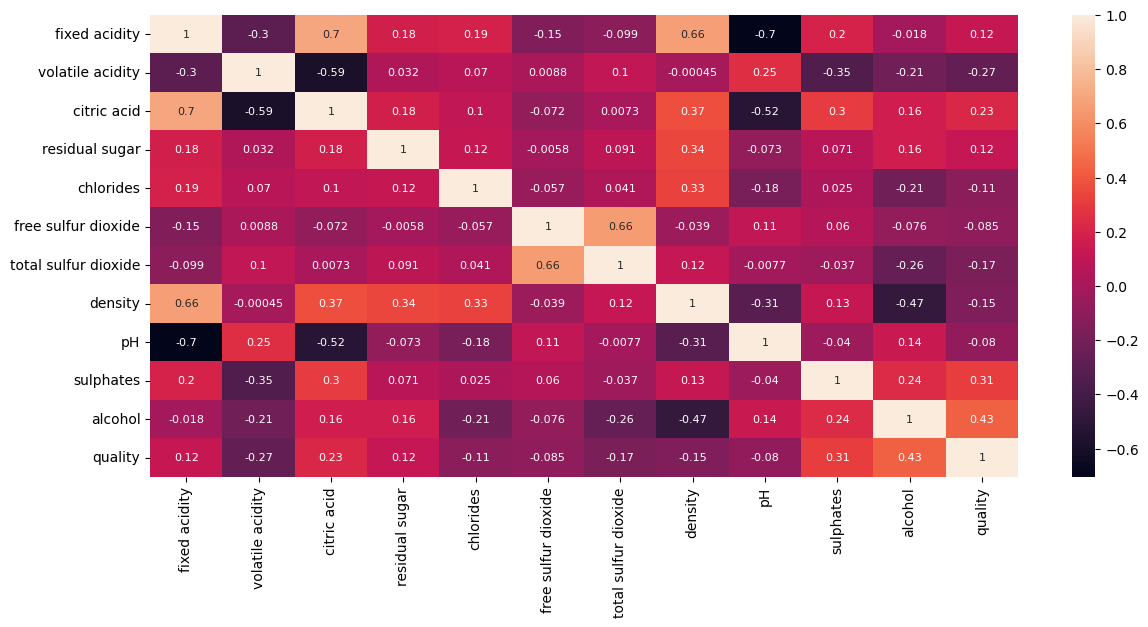

In [105]:
plt.figure(figsize = (14,6))
sns.heatmap(new_df.corr(),annot=True,annot_kws ={'size':8})
plt.show()

### Scaling the data

In [106]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
X_sr = pd.DataFrame(sr.fit_transform(X), columns = X.columns)
X_sr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.529589,1.038708,-1.387413,-0.617061,-0.197420,-0.276875,-0.151874,0.629873,1.374768,-0.621424,-1.024726
1,-0.263403,2.101325,-1.387413,0.422885,0.901684,1.096574,0.934243,0.047678,-0.823752,0.359794,-0.595179
2,-0.263403,1.392914,-1.178214,0.009907,0.624185,0.198376,0.561889,0.164117,-0.398232,0.126070,-0.595179
3,1.697926,-1.440732,1.541370,-0.617061,-0.253416,0.404518,0.740417,0.746312,-1.107432,-0.448750,-0.595179
4,-0.529589,1.038708,-1.387413,-0.617061,-0.197420,-0.276875,-0.151874,0.629873,1.374768,-0.621424,-1.024726
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.390745,0.448365,-0.969015,-0.450692,0.528331,1.588604,0.232309,-1.058494,0.949248,-0.448750,0.122565
1454,-1.623168,0.153194,-0.864416,-0.137753,-1.044647,2.013192,0.467628,-0.930411,1.445688,0.951183,0.801482
1455,-1.314940,-0.082944,-0.707517,0.009907,-0.197420,1.387532,0.086430,-0.569449,0.736488,0.879603,0.611200
1456,-1.623168,0.714019,-0.759816,-0.450692,-0.253416,1.588604,0.232309,-0.726642,1.800288,0.586742,-0.180003


In [107]:
y.value_counts()

0    1257
1     201
Name: quality, dtype: int64

since data is imbalanced we need to use oversample or undersample techniques to balance the data.

In [1]:
! pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [108]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X1, Y1 = sm.fit_resample(X,y)

In [109]:
Y1.value_counts()

0    1257
1    1257
Name: quality, dtype: int64

Next we will build the model, but first we split the data into train and test data

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_curve,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

In [111]:
accuracy = 0
r_state =0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X1, Y1, test_size = 0.25, random_state = i)
    #X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("max aaccuracy score is ", accuracy , "randomstate = ",r_state)

max r2 score is  0.8124006359300477 randomstate =  47


In [112]:
X_train,X_test,y_train,y_test = train_test_split(X1,Y1, test_size = 0.25, random_state = r_state)

##### Logistic Regression

In [171]:
lor = LogisticRegression()
lor.fit(X_train,y_train)
lor_pred_train = lor.predict(X_train)
lor_pred = lor.predict(X_test)
print('\n Logistic Regression \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,lor_pred_train) * 100: .2f}%")
lor_accu = accuracy_score(y_test,lor_pred) * 100 
print(f"Accuracy Score of test data is: ", lor_accu, "%")
print("\n Confusion Matrix", confusion_matrix(y_test,lor_pred))
print('\n Test Classification Report \n', classification_report(y_test,lor_pred))


Accuracy Score of train data is:  77.29%
Accuracy Score of test data is:  81.24006359300478 %

 Confusion Matrix [[247  58]
 [ 60 264]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       305
           1       0.82      0.81      0.82       324

    accuracy                           0.81       629
   macro avg       0.81      0.81      0.81       629
weighted avg       0.81      0.81      0.81       629



In [172]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred_train = gbc.predict(X_train)
gbc_pred = gbc.predict(X_test)
print('\n GradientBoostingclassifier \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,gbc_pred_train) * 100: .2f}%")
gbc_accu = accuracy_score(y_test,gbc_pred) * 100
print(f"Accuracy Score of test data is: ", gbc_accu,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,gbc_pred))
print('\n Test Classification Report \n', classification_report(y_test,gbc_pred))

abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
abc_pred_train = abc.predict(X_train)
abc_pred = abc.predict(X_test)
print('\n AdaBoostclassifier \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,abc_pred_train) * 100: .2f}%")
abc_accu =  accuracy_score(y_test,abc_pred) * 100
print(f"Accuracy Score of test data is: ", abc_accu,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,abc_pred))
print('\n Test Classification Report \n', classification_report(y_test,abc_pred))

bc = BaggingClassifier()
bc.fit(X_train,y_train)
bc_pred_train = bc.predict(X_train)
bc_pred = bc.predict(X_test)
print('\n Baggingclassifier \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,bc_pred_train) * 100: .2f}%")
bc_accu = accuracy_score(y_test,bc_pred) * 100
print(f"Accuracy Score of test data is: ",bc_accu,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,bc_pred))
print('\n Test Classification Report \n', classification_report(y_test,bc_pred))

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred_train = rfc.predict(X_train)
rfc_pred = rfc.predict(X_test)
print('\n RandomForestclassifier \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,rfc_pred_train) * 100: .2f}%")
rfc_accu = accuracy_score(y_test,rfc_pred) * 100
print(f"Accuracy Score of test data is: ",rfc_accu,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,rfc_pred))
print('\n Test Classification Report \n', classification_report(y_test,rfc_pred))

etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
etc_pred_train = etc.predict(X_train)
etc_pred = etc.predict(X_test)
print('\n ExtraTrees classifier \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,etc_pred_train) * 100: .2f}%")
etc_accu = accuracy_score(y_test,etc_pred) * 100
print(f"Accuracy Score of test data is: ",etc_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,etc_pred))
print('\n Test Classification Report \n', classification_report(y_test,etc_pred))

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred_train = dtc.predict(X_train)
dtc_pred = dtc.predict(X_test)
print('\n DecisionTree classifier \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,dtc_pred_train) * 100: .2f}%")
dtr_accu = accuracy_score(y_test,dtc_pred) * 100
print(f"Accuracy Score of test data is: ",dtr_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,dtc_pred))
print('\n Test Classification Report \n', classification_report(y_test,dtc_pred))

knn = KNN()
knn.fit(X_train,y_train)
knn_pred_train = knn.predict(X_train)
knn_pred = knn.predict(X_test)
print('\n KNeighbors Classifier \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,knn_pred_train) * 100: .2f}%")
knn_accu = accuracy_score(y_test,knn_pred) * 100
print(f"Accuracy Score of test data is: ",knn_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,knn_pred))
print('\n Test Classification Report \n', classification_report(y_test,knn_pred))


svc = SVC()
svc.fit(X_train,y_train)
svc_pred_train = svc.predict(X_train)
svc_pred = svc.predict(X_test)
print('\n Super Vector classifier \n')
print(f"Accuracy Score of train data is: {accuracy_score(y_train,svc_pred_train) * 100: .2f}%")
svc_accu=accuracy_score(y_test,svc_pred) * 100
print(f"Accuracy Score of test data is:", svc_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,svc_pred))
print('\n Test Classification Report \n', classification_report(y_test,svc_pred))



 GradientBoostingclassifier 

Accuracy Score of train data is:  95.38%
Accuracy Score of test data is:  92.05087440381558 %

 Confusion Matrix [[267  38]
 [ 12 312]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.88      0.91       305
           1       0.89      0.96      0.93       324

    accuracy                           0.92       629
   macro avg       0.92      0.92      0.92       629
weighted avg       0.92      0.92      0.92       629


 AdaBoostclassifier 

Accuracy Score of train data is:  89.44%
Accuracy Score of test data is:  88.71224165341812 %

 Confusion Matrix [[265  40]
 [ 31 293]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       305
           1       0.88      0.90      0.89       324

    accuracy                           0.89       629
   macro avg       0.89      0.89      0.89       629
weighted avg 

In [175]:
final_data = pd.DataFrame({'Models':['Logistic','GradientBoosting','AdaBoost','Bagging', 'RandomForest','ExtraTreeClassifier','DecisionTree', 'Knn','svc'],
                          'Accuracy_Scores':[lor_accu, gbc_accu,abc_accu,bc_accu,rfc_accu, etc_accu, dtr_accu,knn_accu,svc_accu]})
final_data

,Models,Accuracy_Scores
0,Logistic,81.240064
1,GradientBoosting,92.050874
2,AdaBoost,88.712242
3,Bagging,92.527822
4,RandomForest,94.276630
5,ExtraTreeClassifier,94.753577
6,DecisionTree,91.732909
7,Knn,86.804452
8,svc,76.788553


#### from the above dataframe we see that extratreeclassifier is giving better accuracy next we will go with cross validation score

In [179]:
#Logistic Regression
print('\n Logistic Regression \n')
lr_score = cross_val_score(lor, X1, Y1, cv=5)
print(lr_score)
print(np.mean(lr_score))
lr_diff = (accuracy_score(y_test,lor_pred)- lr_score.mean())
print(lr_diff)

#gradientBoosting
print('\n GradientBoostingclassifier \n')
gbc_score = cross_val_score(gbc, X1, Y1, cv=5)
print(gbc_score)
print(np.mean(gbc_score))
gbc_diff = (accuracy_score(y_test,gbc_pred)- gbc_score.mean())
print(gbc_diff)

#AdaBoost
print('\n AdaBoostingclassifier \n')
abc_score = cross_val_score(abc, X1, Y1, cv=5)
print(abc_score)
print(np.mean(abc_score))
abc_diff = (accuracy_score(y_test,abc_pred)- abc_score.mean())
print(abc_diff)

#Bagging Classifier
print('\n Baggingclassifier \n')
bc_score = cross_val_score(bc, X1, Y1, cv=5)
print(bc_score)
print(np.mean(bc_score))
bc_diff = (accuracy_score(y_test,bc_pred)- bc_score.mean())
print(bc_diff)

#RandomForest
print('\n RandomForestclassifier \n')
rfc_score = cross_val_score(rfc, X1, Y1, cv=5)
print(rfc_score)
print(np.mean(rfc_score))
rfc_diff = (accuracy_score(y_test,rfc_pred)- rfc_score.mean())
print(rfc_diff)

#$xtraTreeClassifier
print('\n ExtraTreeclassifier \n')
etc_score = cross_val_score(etc, X1, Y1, cv=5)
print(etc_score)
print(np.mean(etc_score))
etc_diff = (accuracy_score(y_test,etc_pred)- etc_score.mean())
print(etc_diff)

#Decisiontree
print('\n DecisionTreeclassifier \n')
dtc_score = cross_val_score(dtc, X1, Y1, cv=5)
print(dtc_score)
print(np.mean(dtc_score))
dtc_diff = (accuracy_score(y_test,dtc_pred)- dtc_score.mean())
print(dtc_diff)

#KNeigbors
print('\n KNeighbors classifier \n')
knn_score = cross_val_score(knn, X1, Y1, cv=5)
print(knn_score)
print(np.mean(knn_score))
knn_diff = (accuracy_score(y_test,knn_pred)- knn_score.mean())
print(knn_diff)


#SVC
print('\n SuperVectorclassifier \n')
svc_score = cross_val_score(svc, X1, Y1, cv=5)
print(svc_score)
print(np.mean(svc_score))
svc_diff = (accuracy_score(y_test,svc_pred)- svc_score.mean())
print(svc_diff)




 Logistic Regression 

[0.77137177 0.64811133 0.73161034 0.68389662 0.7250996 ]
0.7120179322471545
0.10038270368289326

 GradientBoostingclassifier 

[0.87872763 0.77137177 0.84493042 0.81312127 0.85657371]
0.8329449597237293
0.08756378431442657

 AdaBoostingclassifier 

[0.80516899 0.71172962 0.79125249 0.77335984 0.77888446]
0.7720790793090065
0.11504333722517468

 Baggingclassifier 

[0.91252485 0.83697813 0.91053678 0.87077535 0.92828685]
0.8918203923867155
0.0334578270091509

 RandomForestclassifier 

[0.944334   0.85884692 0.93439364 0.86481113 0.9501992 ]
0.9105169778143886
0.03224931789308361

 ExtraTreeclassifier 

[0.95626243 0.87276342 0.95626243 0.88270378 0.94621514]
0.9228414374311896
0.024694333633993204

 DecisionTreeclassifier 

[0.87077535 0.82107356 0.87077535 0.83101392 0.86055777]
0.8508391879796916
0.06648990581999048

 KNeighbors classifier 

[0.91053678 0.77932406 0.84493042 0.79125249 0.85856574]
0.836921894925269
0.03112262017806966

 SuperVectorclassifier 



In [184]:
Cross_val_data = pd.DataFrame({'Models':['Logistic','GradientBoosting','AdaBoost','Bagging', 'RandomForest','ExtraTreeClassifier','DecisionTree', 'Knn','svc'],
                          'Cross_val_scores':[lr_diff, gbc_diff,abc_diff,bc_diff,rfc_diff, etc_diff, dtc_diff,knn_diff,svc_diff]})
Cross_val_data

,Models,Cross_val_scores
0,Logistic,0.100383
1,GradientBoosting,0.087564
2,AdaBoost,0.115043
3,Bagging,0.033458
4,RandomForest,0.032249
5,ExtraTreeClassifier,0.024694
6,DecisionTree,0.066490
7,Knn,0.031123
8,svc,-0.017735


from the above dataframe of cross Validation score we find extratreeclassifier is giving the least difference.

##### Hyperparameter Tuning

In [185]:
param_grid = {"n_estimators": [20,40,60,100,150, 200], "criterion" :['gini','entropy','log_loss'], "max_depth":[2,4,6,10]}

In [187]:

etc = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
etc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]})

In [189]:
etc.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 20}

In [191]:
wine = ExtraTreesClassifier(criterion ='gini', max_depth=6, n_estimators=20)

In [193]:
wine.fit(X_train,y_train)
final_pred = wine.predict(X_test)
etc_accu = accuracy_score(y_test,final_pred) * 100
print(f"Accuracy Score of test data is: ",etc_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,final_pred))
print('\n Test Classification Report \n', classification_report(y_test,final_pred))


Accuracy Score of test data is:  85.69157392686805 %

 Confusion Matrix [[257  48]
 [ 42 282]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       305
           1       0.85      0.87      0.86       324

    accuracy                           0.86       629
   macro avg       0.86      0.86      0.86       629
weighted avg       0.86      0.86      0.86       629



#### tried with the best parameters of {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 20} and model score was reduced to 85%

In [194]:
param_grid = {"n_estimators": [20,40,60,100,150, 200], "criterion" :['gini','entropy','log_loss'], "max_depth":[2,4,6,10]}

In [197]:
etc = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
etc.fit(X_train,y_train)
etc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [198]:
wine = ExtraTreesClassifier(criterion ='gini', max_depth=10, n_estimators=100)
wine.fit(X_train,y_train)
final_pred = wine.predict(X_test)
etc_accu = accuracy_score(y_test,final_pred) * 100
print(f"Accuracy Score of test data is: ",etc_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,final_pred))
print('\n Test Classification Report \n', classification_report(y_test,final_pred))

Accuracy Score of test data is:  91.09697933227345 %

 Confusion Matrix [[270  35]
 [ 21 303]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       305
           1       0.90      0.94      0.92       324

    accuracy                           0.91       629
   macro avg       0.91      0.91      0.91       629
weighted avg       0.91      0.91      0.91       629



#### tried with the best parameters of {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100} and model score was bit increased to 91% but less than the score before tuning the parameters

In [199]:
param_grid = {"n_estimators": [150, 200,300], "criterion" :['gini','entropy','log_loss'], "max_depth":[10,12,18,20]}

In [200]:
etc = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
etc.fit(X_train,y_train)
etc.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 300}

In [201]:
wine = ExtraTreesClassifier(criterion ='entropy', max_depth=20, n_estimators=300)
wine.fit(X_train,y_train)
final_pred = wine.predict(X_test)
etc_accu = accuracy_score(y_test,final_pred) * 100
print(f"Accuracy Score of test data is: ",etc_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,final_pred))
print('\n Test Classification Report \n', classification_report(y_test,final_pred))

Accuracy Score of test data is:  94.75357710651828 %

 Confusion Matrix [[280  25]
 [  8 316]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       305
           1       0.93      0.98      0.95       324

    accuracy                           0.95       629
   macro avg       0.95      0.95      0.95       629
weighted avg       0.95      0.95      0.95       629



#### tried with the best parameters of {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 300} and model score is same as the score it was before tuning the model i.e., 94.75%

In [202]:
param_grid = {"n_estimators": [200, 250, 300], "criterion" :['gini','entropy','log_loss'], "max_depth":[20,22,24,30]}

In [203]:
etc = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
etc.fit(X_train,y_train)
etc.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 250}

In [204]:
wine_final = ExtraTreesClassifier(criterion ='entropy', max_depth=20, n_estimators=250)
wine_final.fit(X_train,y_train)
final_pred = wine_final.predict(X_test)
etc_accu = accuracy_score(y_test,final_pred) * 100
print(f"Accuracy Score of test data is: ",etc_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,final_pred))
print('\n Test Classification Report \n', classification_report(y_test,final_pred))

Accuracy Score of test data is:  94.75357710651828 %

 Confusion Matrix [[279  26]
 [  7 317]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       305
           1       0.92      0.98      0.95       324

    accuracy                           0.95       629
   macro avg       0.95      0.95      0.95       629
weighted avg       0.95      0.95      0.95       629



### tried with the best parameters of {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 250} and model score is same as the score it was before tuning the model i.e., 94.75%. so we consider the above parameters and also ExtraTreesClassifier as best model

### Plotting ROC_AUC curve for all the models

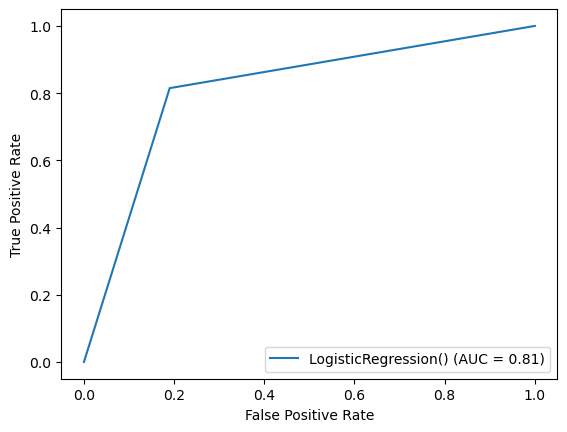

In [205]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,lor_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=lor)
display.plot()

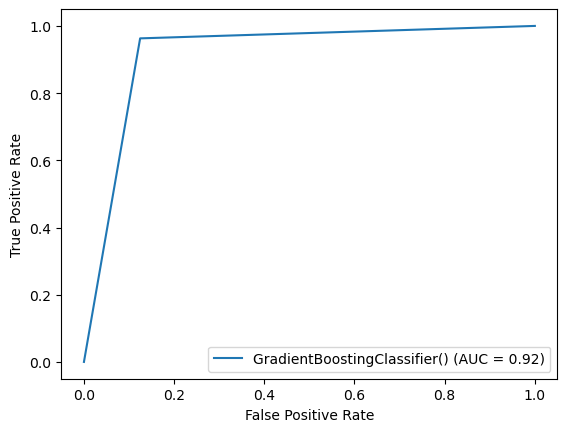

In [207]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,gbc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=gbc)
display.plot()

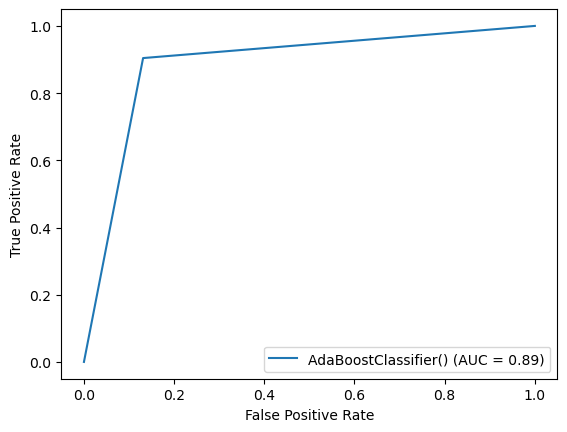

In [208]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,abc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=abc)
display.plot()

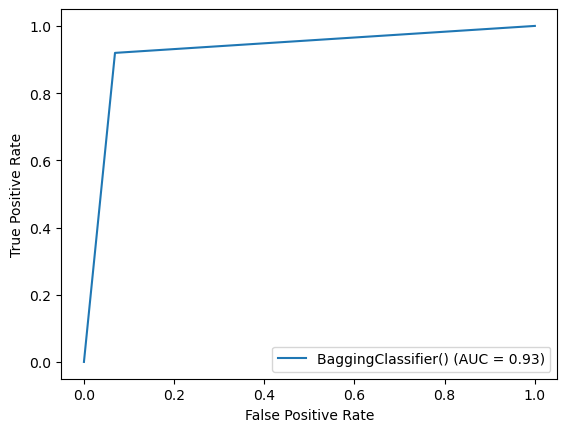

In [209]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,bc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=bc)
display.plot()

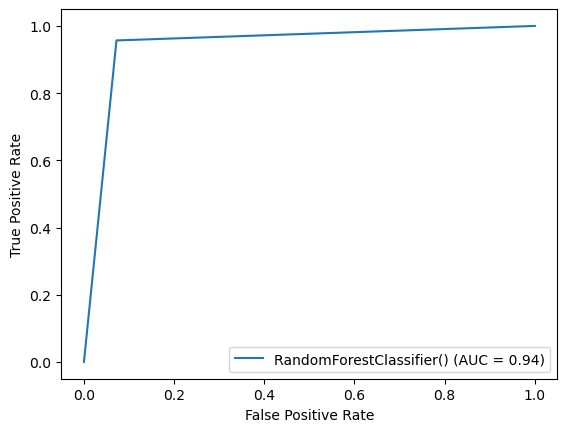

In [210]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,rfc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=rfc)
display.plot()

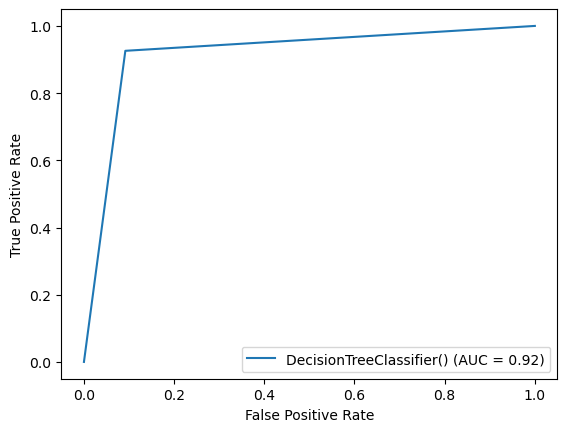

In [211]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,dtc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=dtc)
display.plot()

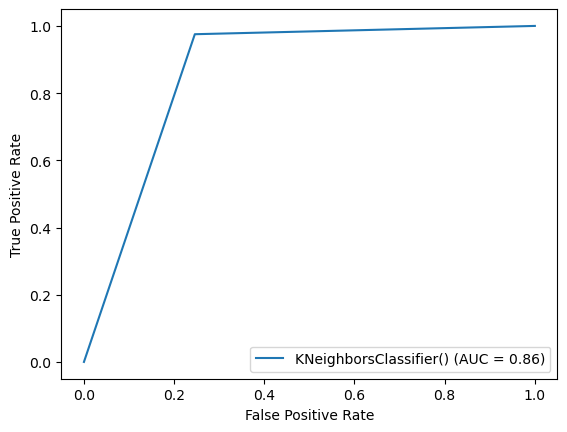

In [212]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,knn_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=knn)
display.plot()

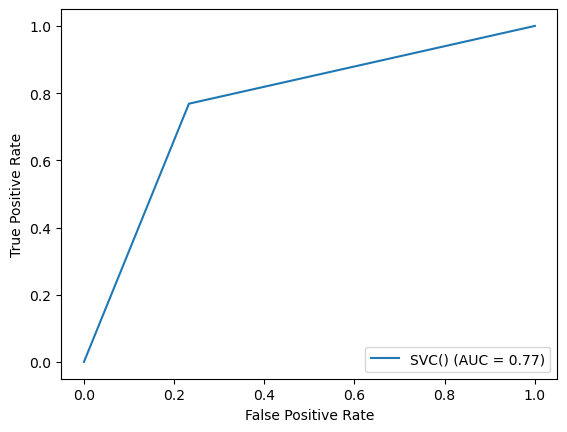

In [213]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,svc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=svc)
display.plot()

#### ROC_AUC Curve for final model
Now, we will plot roc_auc curve for the finally built model with different parameters.

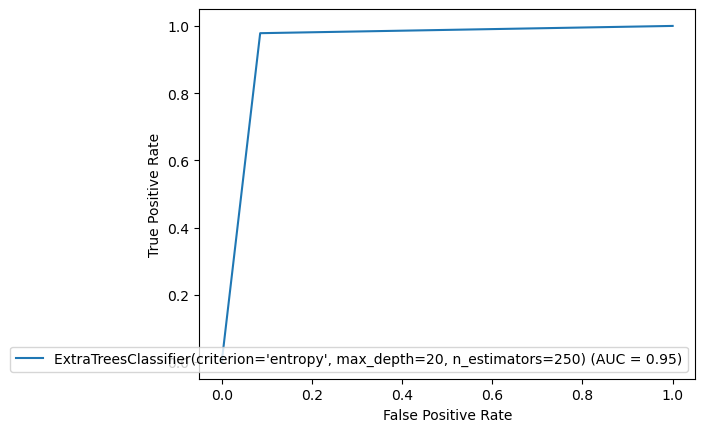

In [214]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,final_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=wine_final)
display.plot()

### Save the model

In [215]:
import joblib
joblib.dump(wine_final,"wine_quality_prediction.pkl")

['wine_quality_prediction.pkl']

In [216]:
#predicting 
model = joblib.load("wine_quality_prediction.pkl")
result = model.score(X_test,y_test)
print(result)

0.9475357710651828


In [217]:
#create dataframe comparing 
prediction = pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=['Predicted','Orignal'])
prediction

,0,1,2,3,4,5,6,7,8,9,...,619,620,621,622,623,624,625,626,627,628
Predicted,0,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,1,0
Orignal,0,0,0,1,1,0,0,1,0,1,...,0,1,1,0,0,0,0,1,1,0


### From the above dataframe we consider the predicted values are almost same to the test values of the dataset and also we consider that ExtraTreesClassifier as best and accurate model.